# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Carregando e tratando a base de dados.


In [2]:
cardio = pd.read_csv("CARDIO_BASE.csv", delimiter=';')

In [3]:
cardio

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,56,1,166,65,1,1,0,0,0,0
9996,50,1,160,93,2,1,0,0,1,1
9997,40,1,158,66,2,2,0,0,1,0
9998,50,1,168,70,3,1,0,0,1,1


In [4]:
# verificando tipos de dados e presença de nulos
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [5]:
# Convertendo a coluna "weight" para float
cardio['weight'] = cardio['weight'].str.replace(",", ".").astype(float)

In [6]:
cardio.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,1.345400,164.308200,74.303710,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,14.566353,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,1.000000,70.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Não identificamos forte presença de outliers. vamos seguir com o pré-processamento.

# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


In [7]:
# Criando o gráfico de barras interativo
fig = px.histogram(cardio, x='cholesterol', color='cardio_disease', barmode='group',
                   labels={'cholesterol': 'Nível de Colesterol', 'cardio_disease': 'Doença Cardiovascular'},
                   title='Distribuição de colesterol por presença de doenças cardiovasculares')

# Adicionando rótulos nas barras
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Ajustando altura e margens para evitar cortes nos números das barras
fig.update_layout(height=500, margin=dict(t=50, b=50))

# Exibir gráfico interativo
fig.show()

Analisando os dados do gráfico, podemos perceber que há uma diferença relevante entre os níveis de colesterol e a presença de doenças cardiovasculares. No nível 1, há uma quantidade maior de indivíduos sem a doença, enquanto nos níveis 2 e 3, a presença da doença é mais significativa, especialmente no nível 3, onde há bem mais casos de doença do que de pessoas saudáveis.  
Isso sugere que colesterol mais elevado pode estar relacionado a um maior risco de problemas cardiovasculares.


In [8]:
fig = px.histogram(cardio, x='gluc', color='cardio_disease', barmode='group',
                   labels={'gluc': 'Nível de glicose', 'cardio_disease': 'Doença Cardiovascular'},
                   title='Distribuição de glicose por presença de doenças cardiovasculares')
fig.update_layout(height=500, margin=dict(t=50, b=50))
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

Assim como na análise do colesterol, há uma tendência de que indivíduos com níveis mais altos de glicose tenham maior incidência de doenças cardiovasculares.  
Observamos que no nível 1 de glicose, temos maior presença de indivíduos saudáveis. Já nos níveis 2 e 3, há um aumento no número de casos da doença, especialmente no nível 3, onde a quantidade de pessoas com doença cardiovascular é um pouco maior do que as sem a doença. Isso sugere uma possível relação entre glicose elevada e risco cardiovascular, mas assim como no caso do colesterol, a diferença entre os grupos não é extrema.


In [9]:
fig = px.histogram(cardio, x='active', color='cardio_disease', barmode='group',
                   labels={'active': 'Pratica atividade física 0 = Não |  1 = Sim', 'cardio_disease': 'Doença Cardiovascular'},
                   title='Pessoa ativa vs presença de doenças cardiovasculares')

fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(height=500, margin=dict(t=50, b=50))
fig.show()

O gráfico sugere que a atividade física pode influenciar a ocorrência de doenças cardiovasculares, mas a diferença entre os grupos ativos e inativos não é tão expressiva a ponto de afirmarmos que o sedentarismo é um fator determinante. Embora pessoas inativas apresentem uma maior incidência da doença, entre aqueles que praticam atividades físicas a quantidade de indivíduos doentes e saudáveis está relativamente equilibrada. Isso indica que outros fatores, como idade, colesterol e hábitos de vida, podem estar desempenhando um papel importante nessa relação. 

In [10]:
# Criando uma coluna combinada para "Fuma e Bebe"
cardio['smoke_alco'] = cardio.apply(lambda x: f"Fuma: {x['smoke']}, Bebe: {x['alco']}", axis=1)

fig = px.histogram(cardio, x='smoke_alco', color='cardio_disease', barmode='group',
                   labels={'smoke_alco': 'Hábito de Fumar e Beber', 'cardio_disease': 'Doença Cardiovascular'},
                   title='Relação entre tabagismo, consumo de álcool e doenças cardiovasculares')

fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(height=500, margin=dict(t=50, b=50))
fig.show()

O gráfico revela a distribuição de indivíduos com e sem doenças cardiovasculares de acordo com seus hábitos de tabagismo e consumo de álcool. Aqui estão os principais pontos observados:
- O maior grupo é composto por indivíduos que não fumam e não bebem, com uma distribuição bastante equilibrada entre quem tem e quem não tem doenças cardiovasculares.
- Entre os que fumam e bebem, o número de pessoas com a doença é ligeiramente menor do que o número de pessoas saudáveis, sugerindo que esses hábitos podem ter alguma relação, mas não de forma isolada.
- Quem fuma, mas não bebe, também apresenta uma distribuição próxima entre os dois grupos, sem uma diferença muito expressiva.
- Quem não fuma, mas bebe, tem um número relativamente pequeno de indivíduos, mas com uma leve predominância de casos de doenças cardiovasculares. 

Apesar dessas observações, as diferenças entre os grupos não são muito extremas, indicando que fumar e beber podem contribuir para o risco cardiovascular, mas possivelmente junto com outros fatores, como idade, colesterol e atividade física


In [11]:
# Criando faixas etárias de 5 em 5 anos
bins = [30, 34, 39, 44, 49, 54, 59, 65]
labels = ['30-34 anos', '35-39 anos', '40-44 anos', '45-49 anos', '50-54 anos', '55-59 anos', '60-65 anos']
cardio['age_group'] = pd.cut(cardio['age'], bins=bins, labels=labels)

fig = px.histogram(cardio, x='age_group', color='cardio_disease', barmode='group',
                   labels={'age_group': 'Faixa Etária', 'cardio_disease': 'Doença Cardiovascular'},
                   title='Relação entre idade e doenças cardiovasculares')

fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(height=600, margin=dict(t=50, b=50))

# Ajustando a ordem do eixo x para garantir que as faixas etárias apareçam corretamente
fig.update_xaxes(categoryorder='array', categoryarray=labels)

fig.show()

O gráfico mostra claramente como a prevalência de doenças cardiovasculares aumenta com a idade. Nos grupos etários mais jovens (35-39 anos), a maioria das pessoas não tem a doença. No entanto, conforme avançamos para faixas etárias maiores, especialmente 50+ anos, o número de indivíduos com a doença começa a superar aqueles sem a condição.

- Entre 40-44 anos, há uma predominância de pessoas sem a doença.
- A partir dos 45-49 anos, ainda temos mais indivíduos saudáveis, mas já percebemos um aumento expressivo nos casos de doenças cardiovasculares.
- Dos 50 anos em diante, observamos a tendência se acentuar, superando os indivíduos saudáveis a partir dos 55 anos. 
- Na faixa etária de 60-65 anos, o número de pessoas com a doença é significativamente maior do que o de pessoas saudáveis.

Isso reforça a correlação entre o avanço da idade e o risco cardiovascular, sugerindo que fatores como hábitos de vida, genética e condições médicas acumuladas podem ter um papel importante.


# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



In [12]:
# dropando as colunas que criamos para a análise bivariada
cardio = cardio.drop(['smoke_alco', 'age_group'], axis=1)

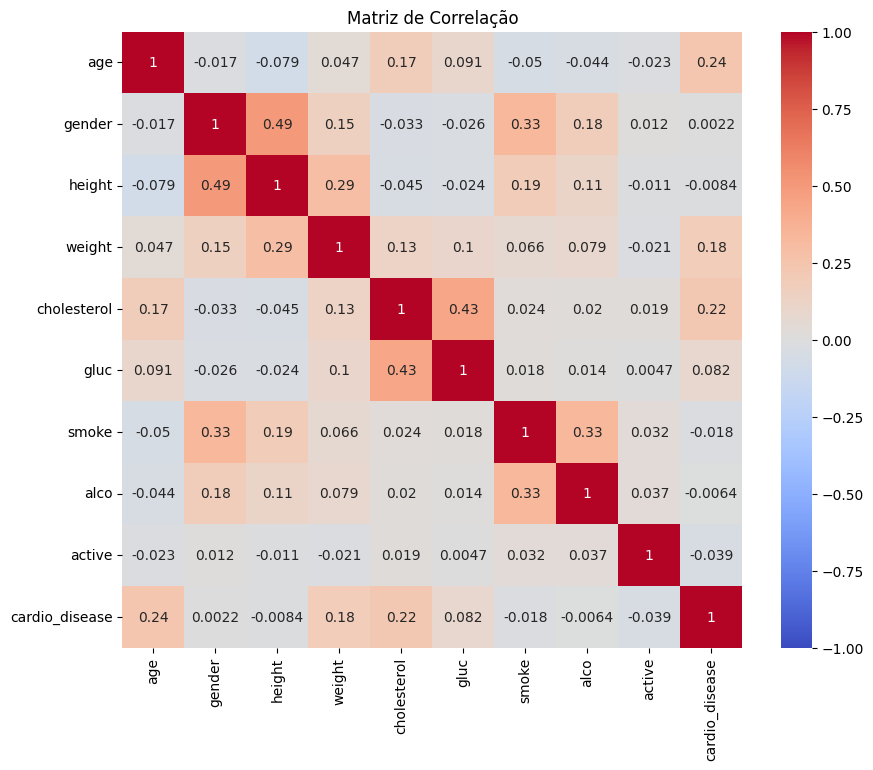

In [13]:
correlation_matrix = cardio.corr()

# Plotando a matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

Ao analisarmos nossa matriz de correlação, observamos que as variáveis de maior correlação com nossa target são: *idade, colesterol, peso e glicose*.  
Essas variáveis apresentaram correlação positiva, indicando que valores mais altos tendem a estar associados à presença de doenças cardiovasculares. Apesar de os coeficientes de correlação não serem elevados, esses resultados fornecem uma base inicial para a seleção de variáveis no modelo.

Outras variáveis, como sexo, altura, tabagismo, consumo de álcool e atividade física, apresentaram correlações muito baixas. No entanto, isso não implica que são irrelevantes. A regressão logística é capaz de identificar padrões e associações que não necessariamente se refletem em correlações lineares simples. Além disso, essas variáveis podem se tornar significativas ao interagir com outras variáveis do modelo.

Assim, mesmo variáveis com baixa correlação inicial foram mantidas para avaliação dentro do modelo de regressão logística, que fornecerá os coeficientes e significância estatística para determinar sua real influência na previsão de doenças cardiovasculares.

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [14]:
# Separando em X (variáveis de entrada) e Y (variável de saída)
X = cardio.drop('cardio_disease', axis=1)  # X contém todas as colunas exceto 'cardio_disease'
Y = cardio['cardio_disease']  # Y contém apenas a coluna 'cardio_disease'

In [15]:
# Verificando o balanceamento dos dados antes de separarmos em treino e teste

cardio['cardio_disease'].value_counts()

cardio_disease
1    5031
0    4969
Name: count, dtype: int64

In [16]:
# Serparando as bases de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Como estamos lidando com variáveis numéricas contínuas com escalas distintas, é ideal realizar a padronização dos dados.  Isso garante que o modelo de regressão logística não seja influenciado indevidamente por variáveis com valores absolutos maiores, evitando que essas recebam um peso excessivo apenas por sua escala. Além disso, a padronização contribui para uma melhor performance do modelo.

In [17]:
# Selecionando apenas as colunas contínuas
num_cols = ['age', 'height', 'weight']

# Iniciando o scaler
sc = StandardScaler()

# Ajustando nos dados de treino
X_train[num_cols] = sc.fit_transform(X_train[num_cols])

# Aplicando nos dados de teste
X_test[num_cols] = sc.transform(X_test[num_cols])

In [18]:
# Verificando o número de linhas e as variáveis das bases

print('\n'.join([
    f'X_train: {X_train.shape}, X_train colunas: {list(X_train.columns)}',
    f'X_test: {X_test.shape}, X_test colunas: {list(X_test.columns)}',
    f'y_train: {Y_train.shape}, y_train coluna: {Y_train.name}',
    f'y_test: {Y_test.shape}, y_test coluna: {Y_test.name}'
]))

X_train: (8000, 9), X_train colunas: ['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X_test: (2000, 9), X_test colunas: ['age', 'gender', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
y_train: (8000,), y_train coluna: cardio_disease
y_test: (2000,), y_test coluna: cardio_disease


# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [19]:
# Iniciando o treinamento
logistic_cardio = LogisticRegression(random_state=0)

In [20]:
logistic_cardio.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [21]:
logistic_cardio.intercept_

array([-0.51079758])

In [22]:
logistic_cardio.coef_

array([[ 0.44183391,  0.02380832, -0.07890441,  0.35203134,  0.60091049,
        -0.12221796, -0.09970964, -0.03183491, -0.19059452]])

In [23]:
previsoes = logistic_cardio.predict(X_train)
relatorio = classification_report(Y_train, previsoes)
print(f'Relatório de Classificação Treino: \n {relatorio}')

Relatório de Classificação Treino: 
               precision    recall  f1-score   support

           0       0.63      0.66      0.64      3968
           1       0.65      0.62      0.63      4032

    accuracy                           0.64      8000
   macro avg       0.64      0.64      0.64      8000
weighted avg       0.64      0.64      0.64      8000



Nosso modelo apresentou desempenho relativamente equilibrado, com a precisão, revocação e F1-Score bastante próximos para ambas as classes, e a acurácia geral de 64% indica que o modelo tem uma taxa de acerto razoável

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [24]:
previsao_teste = logistic_cardio.predict(X_test)
relatorio_test = classification_report(Y_test, previsao_teste)
print(f'Relatorio de Classificação Teste: \n {relatorio_test}')

Relatorio de Classificação Teste: 
               precision    recall  f1-score   support

           0       0.64      0.69      0.67      1001
           1       0.67      0.62      0.64       999

    accuracy                           0.65      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.66      0.65      0.65      2000



O relatório de classificação do teste mostra um desempenho ligeiramente melhor que o do treino, indicando que o modelo está conseguindo generalizar razoavelmente bem, mas ainda com espaço para melhorias

In [25]:
fpr, tpr, thresholds = roc_curve(Y_test, previsao_teste)

# Calcular a AUC
roc_auc = roc_auc_score(Y_test, previsao_teste)
print('AUC: {:.2f}'. format(roc_auc))

AUC: 0.65


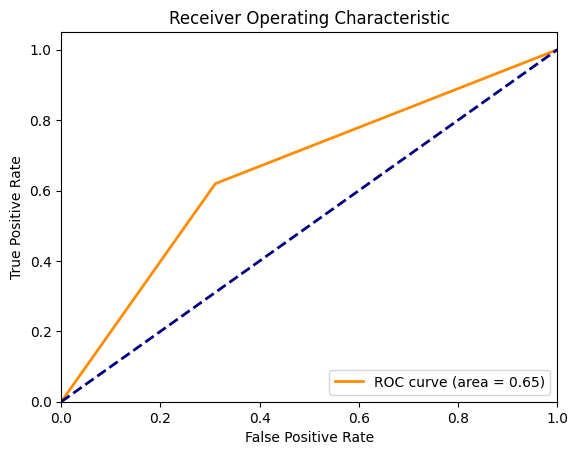

In [26]:
# Gráfico da Curva AUC - ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AUC = 0.65 indica que o modelo tem uma capacidade modesta de distinguir entre as classes (pessoas com ou sem doença cardíaca).  
O modelo não está "cego", mas ainda comete muitos erros ao classificar corretamente os positivos e negativos.

# Melhorando o modelo

In [34]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

print('Os melhores parâmetros:', best_params)

Os melhores parâmetros: {'C': 0.1, 'solver': 'liblinear'}


In [42]:
# Previsões no conjunto de treino
y_pred_train = grid_search.predict(X_train)

# Relatório de classificação para treino
relatorio_train = classification_report(Y_train, y_pred_train)
print(f'Relatório de Classificação Treino: \n{relatorio_train}')

Relatório de Classificação Treino: 
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      3968
           1       0.65      0.62      0.63      4032

    accuracy                           0.64      8000
   macro avg       0.64      0.64      0.64      8000
weighted avg       0.64      0.64      0.64      8000



In [44]:
# Previsões no conjunto de teste
y_pred_test = grid_search.predict(X_test)

# Relatório de classificação para teste
relatorio_test = classification_report(Y_test, y_pred_test)
print(f'Relatório de Classificação Teste: \n{relatorio_test}')

Relatório de Classificação Teste: 
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      1001
           1       0.67      0.62      0.64       999

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



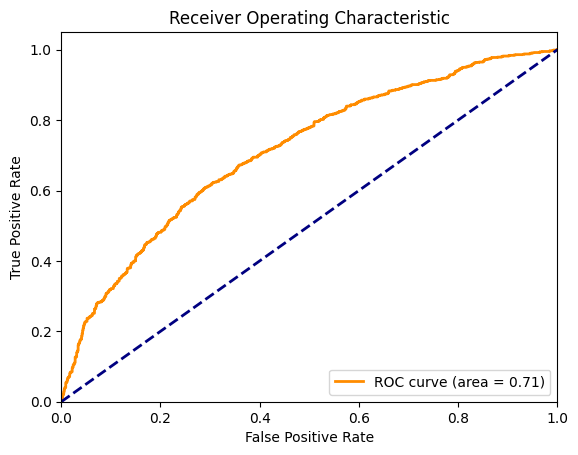

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obter as probabilidades previstas para a classe positiva
y_prob = grid_search.predict_proba(X_test)[:, 1]

# Calcular os valores da curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Gráfico da Curva AUC - ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Nova AUC de 0.71 indicando melhoria no modelo, apresentando umum desempenho razoável na separação das classes.

# 7) Explique:

A) Explique com suas palavras regressão logistica.

A regressão logística é um modelo estatístico usado para prever a probabilidade de um determinado evento acontecer, geralmente em problemas de classificação binária (exemplo: sim/não, positivo/negativo). Embora o nome contenha "regressão", esse método é essencialmente usado para classificação e não para prever valores contínuos.  

O funcionamento do modelo se baseia na função sigmoide (logística), que transforma qualquer valor numérico em uma probabilidade entre 0 e 1. Com essa probabilidade, podemos definir um limiar (por exemplo, 0.5) e classificar as previsões em uma das duas classes.



B) Explique porque a regressão logistica é um modelo de classificação.

Embora tenha o nome "regressão", a regressão logística se encaixa nos modelos de classificação porque não prevê números contínuos como a regressão linear. Em vez disso, ela atribui cada entrada a uma categoria específica com base na probabilidade calculada.

Exemplo:
- Se um modelo de regressão linear prever uma temperatura de 23°C, isso é um valor contínuo.
- Já um modelo de regressão logística preveria algo como "chuva" ou "sol" com base na probabilidade de cada condição climática.


C) Explique quais pontos em comum a regressão logistica tem da regressão linear.

Embora sejam usados para propósitos diferentes, os dois modelos têm algumas semelhanças:
- Ambos são modelos lineares – A regressão logística é essencialmente uma regressão linear aplicada a uma transformação sigmoide.
- Ambos usam pesos (coeficientes) – A ideia de calcular pesos para variáveis de entrada e combiná-los com uma soma ponderada é semelhante.
- Ambos podem ser regularizados – Podemos aplicar técnicas como Lasso (L1) ou Ridge (L2) para evitar overfitting.

A grande diferença é que a regressão logística transforma a saída com a função sigmoide, enquanto a regressão linear mantém valores contínuos.
